# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [8]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [0]:
present_dir = "gdrive/My Drive/deep_learning/project-dog-classification/"
dataset_root = "gdrive/My Drive/deep_learning/datasets/dog_breed_project/datasets/"


In [10]:
import numpy as np
from glob import glob
import os

os.listdir(dataset_root)
# load filenames for human and dog image
human_files = np.array(glob(dataset_root + "lfw/*/*"))
dog_files = np.array(glob(dataset_root + "dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13223 total human images.
There are 8341 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


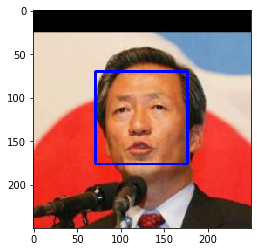

In [26]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

cascade_classifier = present_dir + 'haarcascades/haarcascade_frontalface_alt.xml'
# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier(cascade_classifier)

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [0]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 


__Answer:__ 

Below is the output of the algorithm:

percent of human faces detected is 99.0
percent of human faces detected is 8.0

This means that the algorithm is 99 percent accurate at detecting true positives and is 92 percent accurate at detecting negatives.

In [27]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]
    
def face_percentage(files_short):
    faces_true = 0
    for file in files_short:
        if face_detector(file) == True:
            faces_true += 1
    percentage_detected_faces = (faces_true/len(files_short))*100
    
    print("percent of human faces detected is " + str(percentage_detected_faces))

face_percentage(human_files_short)
face_percentage(dog_files_short)


percent of human faces detected is 99.0
percent of human faces detected is 8.0


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [0]:
import torch
import torchvision.models as models

# download vgg16 model and and move to cuda if available
VGG16 = models.vgg16(pretrained=True)
use_cuda = torch.cuda.is_available()
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [0]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

vgg16 = models.vgg16(pretrained=True)

def image_loader(image_name):
    '''
    Loads image from path and returns a 
    tensor in a size a classification will accept
    '''
    imsize = 224
    loader = transforms.Compose([transforms.Resize(imsize), transforms.ToTensor()])
    image = Image.open(image_name)
    image = loader(image).float()
    return image.unsqueeze(0)

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted class using image loader 
    '''
    image = image_loader(img_path)
    out = vgg16(image)
    _, index = torch.max(out, 1)
    
    return index.data.numpy()[0]

In [0]:
VGG16_predict(dog_files_short[1])

268

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [0]:
def dog_detector(img_path):
    predicted_class = VGG16_predict(img_path)
    return predicted_class > 150 and predicted_class < 269


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

Below is the algorithm output:

percent of dogs detected are 95.0
percent of dogs detected are 0.0

The first printed line is for the `dog_files_short` variable (all dogs) and the second printed line is for the `human_files_short` variable (all humans). This output suggests that the algorithm is 95 percent accurate at detecting true positives/negatives (when detecting dogs) and 100 percent accurate at detecting true/false negatives. 

In [0]:
def dog_percentage(files_short):
    dog_true = 0
    for file in files_short:
        if dog_detector(file):
            dog_true += 1
    percentage_detected_dogs = (dog_true/len(files_short))*100
    
    print("percent of dogs detected are " + str(percentage_detected_dogs))

dog_percentage(dog_files_short)
dog_percentage(human_files_short)


percent of dogs detected are 95.0
percent of dogs detected are 0.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="gdrive/My Drive/deep_learning/project-dog-classification/images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="gdrive/My Drive/deep_learning/project-dog-classification/images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="gdrive/My Drive/deep_learning/project-dog-classification/images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!



In [0]:
import torchvision.transforms as transforms

root_path = os.path.join(dataset_root,"dogImages")
input_shape = 256
resized_shape = 224
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
# define dictionary for transformations to be used later while loading data
transforms_dict = {
    
    'train' : transforms.Compose([transforms.Resize(input_shape),
                                transforms.RandomResizedCrop(resized_shape),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=mean,
                                                      std=std)]),
    
    'valid' : transforms.Compose([transforms.Resize(input_shape),
                                  transforms.CenterCrop(resized_shape),
                                 transforms.ToTensor(),
                                transforms.Normalize(mean=mean,
                                                      std=std)]),
    
    'test' : transforms.Compose([transforms.Resize(input_shape),
                                 transforms.CenterCrop(resized_shape),
                                 transforms.ToTensor(),
                                transforms.Normalize(mean=mean,
                                                      std=std)]),
}


In [0]:
from torchvision import datasets

num_workers = 0
batch_size = 20
data_loaders = {}
image_datasets = {}

def define_loaders(data_subset, data_loaders_dict, image_datasets_dict):
      """Function to update dictionaries for each subset of the datasets and data loaders."""
      image_datasets_dict.update({data_subset: datasets.ImageFolder(os.path.join(root_path, data_subset), 
                                              transforms_dict[data_subset])})
      
      data_loaders_dict.update({data_subset: torch.utils.data.DataLoader(image_datasets_dict[data_subset], batch_size=batch_size,
                                              shuffle=True, num_workers=num_workers)})

define_loaders('train',data_loaders, image_datasets)
define_loaders('valid',data_loaders, image_datasets)
define_loaders('test',data_loaders, image_datasets)


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?

- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?



**Answer**:

VGG accepts an input shape of (224*224) so I decided to draw from that convention when deciding the input shape for my model. For the training set I randomly recropped the image to avoid overfitting to a specific location on a picture. On the validation and test set I used a center-crop because that seemed most likely to capture the object of interest. 

I added rotational flips to the training loader so that the model would not be overfit to a specific orientation of a picture. The specific numbers I used for normalizing the data are from the tutorial linked below:

https://jhui.github.io/2018/02/09/PyTorch-Data-loading-preprocess_torchvision/


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [18]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    '''
    Each block represents an activation function, a Convulutional/Linear layer and
    additional parameters (pooling, dropout etc)
    '''

    self.conv_block1 = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
        nn.BatchNorm2d(64),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),
        )
    
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(64, 192, kernel_size=5, padding=2),
        nn.BatchNorm2d(192),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),
        )
    
    self.conv_block3 = nn.Sequential(
        nn.Conv2d(192, 384, kernel_size=3, padding=1),
        nn.BatchNorm2d(384),
        nn.ReLU(inplace=True),
        )
    
    self.conv_block4 = nn.Sequential(
        nn.Conv2d(384, 256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(inplace=True),
        )
    
    self.conv_block5 = nn.Sequential(
        nn.Conv2d(256, 256, kernel_size=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(inplace=True),
        )

    self.conv_block6 = nn.Sequential(
        nn.Conv2d(256, 256, kernel_size=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(inplace=True),
        nn.AdaptiveMaxPool2d((10,10))
        )

    self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

    self.classifier_block1 = nn.Sequential(
        nn.Dropout(),
        nn.Linear(256 * 6 * 6, 4096),
        nn.ReLU(inplace=True),
        )

    self.classifier_block2 = nn.Sequential(
        nn.Dropout(),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),
        )

    self.classifier_out_layer = nn.Sequential(
        nn.Linear(4096, 133),
        )

  def forward(self, x):
    x = self.conv_block1(x)
    x = self.conv_block2(x)
    x = self.conv_block3(x)
    x = self.conv_block4(x)
    x = self.conv_block5(x)
    x = self.conv_block6(x)
    x = self.avgpool(x)
    x = torch.flatten(x, 1)
    x = self.classifier_block1(x)
    x = self.classifier_block2(x)
    x = self.classifier_out_layer(x)
    return x

model_scratch = Net()
print(model_scratch)
if use_cuda:
    model_scratch.cuda()


Net(
  (conv_block1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block3): Sequential(
    (0): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv_block4): Sequential(
    (0): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, mom

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I drew inspiration from the AlexNet because of its effectiveness for object detection tasks despite its relative simplicity. However I did explore parameters to see which if I could update the architecture to increase the accuracy. The changes I ended up making to the AlexNet architecture were to add batch normalization at each step, (for stability and to decrease overfitting) and to add an additional convolutional block at the end. I added the final convolutional block thinking it may increase the accuracy. There was an insubstantial increase (<1%).


https://pytorch.org/docs/stable/_modules/torchvision/models/alexnet.html

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [0]:
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()

optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [0]:
def train(n_epochs, train_loader, valid_loader,
          model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        train_loss = 0.0
        valid_loss = 0.0
        
        # train model in loop 
        for batch_idx, (data, target) in enumerate(train_loader):
            # move to CUDA if available
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            # clear the gradients
            optimizer.zero_grad()
            output = model(data)
            # calculate loss
            loss = criterion(output, target)
            loss.backward()
            # parameter update
            optimizer.step()
            # update training loss
            train_loss += loss.item() * data.size(0)
            
        # validate model in loop 
        for batch_idx, (data, target) in enumerate(valid_loader):
            # move to CUDA if available
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            # forward pass
            output = model(data)
            loss = criterion(output, target)
            # update validation loss
            valid_loss += loss.item() * data.size(0)
        
        # calculate average loss
        train_loss = train_loss / len(train_loader.dataset)
        valid_loss = valid_loss / len(valid_loader.dataset)
        
        print('Epoch: {}\tTraining Loss: {:.6f}\t Validation Loss: {:.6f}'.
             format(epoch, train_loss, valid_loss))
        
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).    Saving model...'.
                 format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    
    return model

In [0]:
n_epochs = 20
# train the model
path_to_saved_model = os.path.join(present_dir, 'model_scratch.pt')

In [0]:
model_scratch = train(n_epochs, data_loaders['train'], data_loaders['valid'], model_scratch, optimizer_scratch, criterion_scratch, use_cuda, path_to_saved_model)
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load(path_to_saved_model))

Epoch: 1	Training Loss: 4.871378	 Validation Loss: 4.767275
Validation loss decreased (inf --> 4.767275).    Saving model...
Epoch: 2	Training Loss: 4.687045	 Validation Loss: 4.514416
Validation loss decreased (4.767275 --> 4.514416).    Saving model...
Epoch: 3	Training Loss: 4.525572	 Validation Loss: 4.403504
Validation loss decreased (4.514416 --> 4.403504).    Saving model...
Epoch: 4	Training Loss: 4.417819	 Validation Loss: 4.281336
Validation loss decreased (4.403504 --> 4.281336).    Saving model...
Epoch: 5	Training Loss: 4.339256	 Validation Loss: 4.175660
Validation loss decreased (4.281336 --> 4.175660).    Saving model...
Epoch: 6	Training Loss: 4.257939	 Validation Loss: 4.137017
Validation loss decreased (4.175660 --> 4.137017).    Saving model...
Epoch: 7	Training Loss: 4.192550	 Validation Loss: 4.038059
Validation loss decreased (4.137017 --> 4.038059).    Saving model...
Epoch: 8	Training Loss: 4.133891	 Validation Loss: 3.962413
Validation loss decreased (4.038059

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [0]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [0]:
path_to_saved_model = os.path.join(present_dir, 'model_scratch.pt')
model_scratch.load_state_dict(torch.load(path_to_saved_model))
test(data_loaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.106677


Test Accuracy: 21% (179/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [0]:
## TODO: Specify data loaders
loaders_transfer = data_loaders

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [20]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

def transfer_model(outputs, model):
    for param in model.features.parameters():
        param.required_grad = False
    
    final_layer_idx = len(model.classifier) - 1
    final_layer = model.classifier[final_layer_idx]
    input_to_final_layer = final_layer.in_features
    new_last_layer = nn.Linear(input_to_final_layer, outputs)
    model.classifier[final_layer_idx] = new_last_layer;
    
    return model;

model_transfer = transfer_model(133, VGG16)
print(model_transfer)

if use_cuda:
    model_transfer = model_transfer.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I chose the recommended VGG16 model and changed the final layer so that the outputs would correspond to the categories aligning to the dog breeds. Using pretrained networks is a practical approach for computer vision related tasks, due to limits on time and data. Using the cross-entropy-loss for the criterion worked well for the categorical nature of the problem.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [0]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [0]:
path_to_saved_model_transfer = os.path.join(present_dir, 'model_transfer.pt')

In [0]:
model_transfer = train(20, loaders_transfer['train'], loaders_transfer['valid'], model_transfer, optimizer_transfer, criterion_scratch, use_cuda, path_to_saved_model_transfer)

Epoch: 1	Training Loss: 4.426735	 Validation Loss: 3.469407
Validation loss decreased (inf --> 3.469407).    Saving model...
Epoch: 2	Training Loss: 3.158385	 Validation Loss: 1.925187
Validation loss decreased (3.469407 --> 1.925187).    Saving model...
Epoch: 3	Training Loss: 2.238691	 Validation Loss: 1.295321
Validation loss decreased (1.925187 --> 1.295321).    Saving model...
Epoch: 4	Training Loss: 1.846849	 Validation Loss: 1.109736
Validation loss decreased (1.295321 --> 1.109736).    Saving model...
Epoch: 5	Training Loss: 1.625263	 Validation Loss: 0.990323
Validation loss decreased (1.109736 --> 0.990323).    Saving model...
Epoch: 6	Training Loss: 1.475666	 Validation Loss: 0.862996
Validation loss decreased (0.990323 --> 0.862996).    Saving model...
Epoch: 7	Training Loss: 1.387102	 Validation Loss: 0.840238
Validation loss decreased (0.862996 --> 0.840238).    Saving model...
Epoch: 8	Training Loss: 1.338974	 Validation Loss: 0.767705
Validation loss decreased (0.840238

<All keys matched successfully>

In [22]:
model_transfer.load_state_dict(torch.load(path_to_saved_model_transfer))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [0]:
test(data_loaders, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.508014


Test Accuracy: 84% (707/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [0]:
def get_index_prediction(image):
  out = model_transfer(image)
  index = torch.argmax(out)
  return index

def get_image_tensor(img_path):
  imsize = 224
  loader = transforms.Compose([transforms.Resize(imsize), transforms.ToTensor()])
  image = Image.open(img_path)
  image = loader(image).float()
  image = image.type(torch.cuda.FloatTensor)
  return image.unsqueeze(0)

def predict_breed_transfer(img_path):
    class_names_without_number = [item[4:].replace("_", " ") for item in image_datasets['train'].classes]    
    image = get_image_tensor(img_path)
    index = get_index_prediction(image)

    return_breed = class_names_without_number[index]
    return return_breed

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [0]:

def display_image(img_path):
    img = Image.open(img_path)
    _, ax = plt.subplots()
    ax.imshow(img)
    plt.axis('off')
    plt.show()

def run_app(img_path):
  breed = predict_breed_transfer(img_path)
  if dog_detector(img_path):
    print("It's a dog!")
    print("predicted breed: " + breed)
  elif face_detector(img_path):
    print("It's a human!")
    print("resembling breed: " + breed)
  else:
    print("It's a unknown object!")

  display_image(img_path)   


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

There are standard ways in which a machine learning tasks can be improved which apply here:

1. More time to train the model
2. More time to experiment with architectures
3. More data to train the model

In [3]:
! ls gdrive/My\ Drive/deep_learning/project-dog-classification/img_from_comp


cat1.JPG  cat2.JPG  dog1.JPG  dog2.JPG	human1.JPG  human2.JPG


It's a human!
resembling breed: American water spaniel


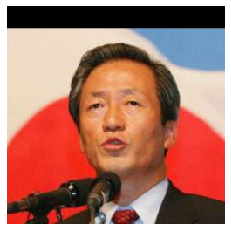

It's a human!
resembling breed: Bedlington terrier


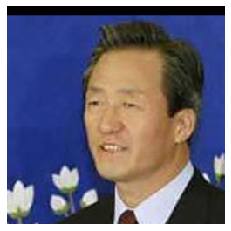

It's a human!
resembling breed: Beagle


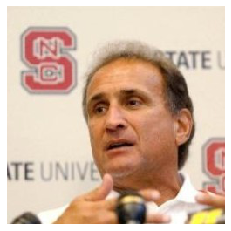

It's a dog!
predicted breed: Xoloitzcuintli


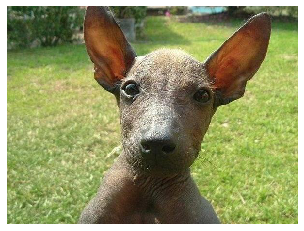

It's a unknown object!


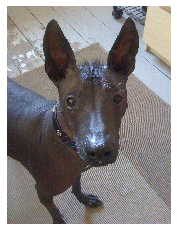

It's a dog!
predicted breed: Xoloitzcuintli


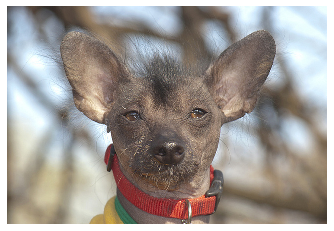

It's a unknown object!


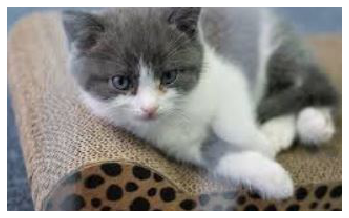

It's a human!
resembling breed: American foxhound


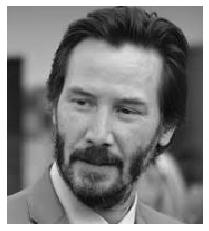

It's a unknown object!


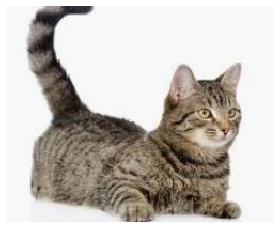

It's a dog!
predicted breed: Anatolian shepherd dog


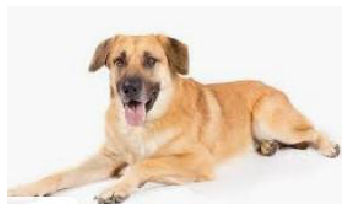

It's a human!
resembling breed: Dogue de bordeaux


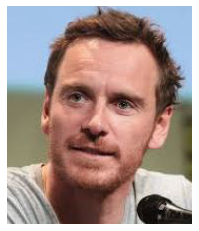

It's a dog!
predicted breed: Labrador retriever


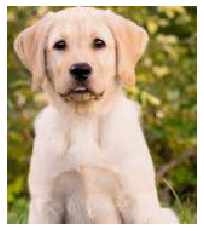

In [28]:
import numpy as np
from glob import glob
import os
# load files from computer as per instructions
# directory contains six images
computer_files_dir=os.path.join(present_dir, "img_from_comp")
comp_files = np.array(glob(computer_files_dir + "/*"))

os.path.join(present_dir, "img_from_comp")
for file in np.hstack((human_files[:3], dog_files[:3], comp_files)):
    run_app(file)